# Tutorial 1 : Python basics 

Python is a popular computer language. We will use it along with 4 libraries: numpy for array handeling, pandas for time series, scikit-learn for machine learning tools and matplotlib for ploting. There are *a lot* of ressources on the web: the user manuel remains the primary location where you should look if you are looking for documentation about a specific function. https://stackoverflow.com/ is also a good source of information since many people before you have already had the same question as you. A good intro to numpy: https://sebastianraschka.com/blog/2020/numpy-intro.html

Even though python is a great language, don't forget that it is an [Interpreted language](https://en.wikipedia.org/wiki/Interpreter_(computing)). That means that python can be very slow. For this reason you shoud 

- Avoid loops
- Rely on existing libraries when available

Indeed, most modern libraries deffer the heavy lifting part to compiled bits of codes which typically run much faster than your own implementation.

### Numpy for array handling

Numpy is the core library when it comes to manipulating "dense" arrays of numbers and you should always use it instead of raw python lists. Numpy also comes with a couple of linear algebra routines to perform basic operations (matrix multiplication, linear systems, eigenvalue solver). However for large-scale application (and sparse matrices) we will use different libraries (like scipy).

In [1]:
import numpy as np

Vectors are first declared as a list of number and are then converted to numpy arrays. Note that python does not make the difference between row vectors and column vectors: all vectors are treated as rows.

In [2]:
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Matrices are declared as an array of arrays in a similar way as vectors. Note that python is case sensitive

In [3]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In order to manipulate row or column vectors, one must add a new dimension as shown below:

In [4]:
x_col = x[:,None]
print(x_col)

[[1]
 [2]
 [3]]


You can compute the transpose of a vector with the method `.T`. However keep in mind that the transpose of a 1d vector does not really make sense *in python*. If you want to transpose a vector in python, it must have at least two dimensions.

> ***Question***
> - Try to transpose `x` and `x_col` and check their dimensions.
- Hint: You can always check the dimensions of your array with the method `.shape`.

In [5]:
# your code here
print(x_col.T.shape)
print(x.shape)
print(x.T.shape)

(1, 3)
(3,)
(3,)


Matrix multiplication can be achieved with `np.dot`, `np.matmul`, `@` or `np.einsum`.
> ***Question***
> - Pick the one you prefer to compute $\mathbf A \mathbf x$, $\mathbf x \mathbf x^\top$, and $\mathbf x^\top \mathbf x$.

- Hint: Did I already warned you about transposing 1d vectors in python?
- Hint2: Einsum is the most advanced function but also the most complicated. [This tutorial](https://ajcr.net/Basic-guide-to-einsum/) will tell you more about it
- Hint3: you can add a question mark to the name of the function to access the help: `np.einsum?`

In [6]:
# your code here
print("Ax = \n", A@x_col)
print("xx^T = \n", np.dot(x_col,x_col.T))
print("x^Tx = \n", np.dot(x,x)) # or simply np.dot(x,x)

Ax = 
 [[14]
 [32]
 [50]]
xx^T = 
 [[1 2 3]
 [2 4 6]
 [3 6 9]]
x^Tx = 
 14


You can access the first element of an array with `x[0]` and the last element with `x[-1]`. You can also select a subset using slices like `x[0:2]` (or `x[:2]`). Be careful that the last index of the slice is not part of the subset.

> ***Question***
> - Can you select the last two element of the vector $\mathbf x$ with negative indices?

In [7]:
# your code here
x[-2:]

array([2, 3])

Numpy comes with the standard math function `np.exp`, `np.sqrt`, `np.sin`. Each of these functions applied to an an array is applied element-wise. For instance `A**2` raises each element of `A` to the power of 2.

> ***Question***
> - Is `A*A` the same as `A@A`?

In [8]:
# your code here
print(A*A)
print(A@A)

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


#### Broadcasting

In python, we can add, subtract, multiply, (etc.) arrays elementwise. In this context arrays have to be of the same size. But when we do `A+1`, we add the scalar `1` to each element of the array `A`: this type of operation is called [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). 

> ***Question***
> - Check the broadcasting rules and add `x` to each column of `A`

In [9]:
# your code here
A+x_col

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

#### Generating arrays

Empty arrays can be generated with `np.zeros`. We can also generate array with [random numbers](https://numpy.org/doc/stable/reference/random/index.html). The most useful functions are
- [`np.random.rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) (unifrom distribution)
- [`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) (standard normal distribution) 
- [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) (normal distribution)

> ***Question***
> - Generate 2 arrays $v_1$ and $v_2$ with $N=5000$ observations following the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) $\mathcal N (\mu_1,\sigma_1^2)$ for $v_1$ and $\mathcal N (\mu_2,\sigma_2^2)$ for $v_2$, with $\mu_1 = 2$, $\mu_2 = 1$, $\sigma_1 = 5$, $\sigma_2 = 1$

In [10]:
mu1 = 2
mu2 = 1

sigma1 = 5
sigma2 = 1

N = 500

# your code here
v1 = np.random.normal(mu1,sigma1,N)
v2 = np.random.normal(mu2,sigma2,N)

> ***Question***
> - Compute the mean of each array.
> - How does it compare to $\mu_1$ and $\mu_2$

In [11]:
# your code here
print(np.mean(v1))
print(np.mean(v2))
# the mean are close to mu_1 and mu_2.
#This illustrate the difference between the sample mean and the expected value

2.0528600172727978
0.9161370028851713


> ***Question***
> - Do you think $v_1$ and $v_2$ are correlated?
> - Can you compute the actual covariance between $v_1$ and $v_2$ with `np.cov`?
> - Recall the definition of the covariance between two variables. [Hint](https://en.wikipedia.org/wiki/Covariance)
> - What is the expected covariance matrix in terms of $\sigma_1$ and $\sigma_2$
> - Do you recognize the array `Cv` defined below?

In [12]:
# your code here
# v1 and v2 and independent random variables, they should not be correlated
print (np.cov(v1,v2))
# The expected covariance matrix is Cv
Cv = np.array([[sigma1**2, 0], [0,sigma2**2]])

[[26.21543433 -0.26805891]
 [-0.26805891  1.04378819]]


As you just saw, $v_1$ and $v_2$ are not correlated. Let's apply the linear transformation
\begin{align}
w_1& = \cos \theta v_1 - \sin \theta v_2\\
w_2& = \sin \theta v_1 + \cos \theta v_2
\end{align}
That you can also write for each realization
\begin{equation}
\mathbf{w} = \mathbf{R}\mathbf{v}
\end{equation}
with $\mathbf R$ the rotation matrix
\begin{align}
 \mathbf{R} &= \begin{bmatrix}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
  \end{bmatrix}
\end{align}


> ***Question***
> - Create the rotation matrix `R` with $\theta=\pi/3$
> - In order to compute $\mathbf w$ it is convenient to store $v_1$ and $v_2$ in a matrix
`V = np.array([v1,v2])`. Compute `V`.
> - Compute `W` with one matrix multiplication.

Note that the layout for `V` and `W` is the opposite as the one we adopted in class. We will adopt this new layout just for this tutorial.

In [13]:
# your code here
theta = np.pi/3
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
V = np.array([v1,v2])
W = np.matmul(R,V)

In [14]:
# your code here

> ***Question***
> - Compute the mean of $\mathbf w = (w_1,w_2)$ with two different techniques: 
>     - direct computation with `np.mean` (be careful, you need to compute the mean along the second dimension only! Look at the documentation.)
>     - with $R$ and the mean of $\mathbf v$.

For the second method, you will have to derive the formula from the definition of $\mathbf w$

In [15]:
# your answer here
print(np.mean(W,1))
print(R@np.mean(V,1))

[0.23303209 2.23589743]
[0.23303209 2.23589743]


> ***Question***
> - Can you guess what the covariance between $w_1$ and $w_2$ will be? [Hint](https://en.wikipedia.org/wiki/Covariance#Covariance_of_linear_combinations)
> - Compute the theoretical covariance matrix $C_w$ as a function of $R$ and $C_v$ (the covariance matrix of $\mathbf v$) [Hint](https://en.wikipedia.org/wiki/Covariance#Auto-covariance_matrix_of_real_random_vectors)
> - Compute the covariance matrix of $\mathbf w$ with 2 methods: 
>      - with `np.cov`, 
>      - with `R` and `Cv`



\begin{align}
\operatorname{Cov}(w_1,w_2) &= \operatorname{Cov}(\cos \theta v_1 - \sin \theta v_2, \sin \theta v_1 + \cos \theta v_2)\\
& = \cos \theta \sin \theta \operatorname{Cov}(v_1,v_1) - \cos \theta \sin \theta \operatorname{Cov}(v_2,v_2)\\
& = \cos \theta \sin \theta ( \operatorname{Var}(v_1) - \operatorname{Var}(v_2))
\end{align}
because $\operatorname{Cov}(v_1,v_2) = 0$

we expect $\operatorname{Cov}(w_1,w_2)= \frac{1}{2}\frac{\sqrt{3}}{2}(25+1)\simeq 10.39$ 

The mean of $\mathbf w$ is
\begin{equation}
E(\mathbf w) = E(\mathbf R \mathbf v ) = \mathbf R E(\mathbf v ) 
\end{equation}

and the covariance matrix of $\mathbf w$ is
\begin{align}
\mathbf C_w &= E(\mathbf w \mathbf w^\top ) - E(\mathbf w) E(\mathbf w^\top)\\
&= E(\mathbf R \mathbf v \mathbf v^\top \mathbf R^\top) - E(\mathbf R \mathbf v)E(\mathbf v^\top \mathbf R^\top)\\
& = \mathbf R E(\mathbf v \mathbf v^\top) \mathbf R^\top - \mathbf R E(\mathbf v) E(\mathbf v^\top)\mathbf R^\top\\
& = \mathbf R \mathbf C_v \mathbf R^\top
\end{align}

where $\mathbf C_v$ is the covriance matrix of $\mathbf v$



In [16]:
# your answer here
# your answer here
print ("Empirical covariance matrix: \n", np.cov(W))
# the cross diagonal term should be close to 10.39
Cw = R@Cv@R.T
print("Population covariance matrix:\n", Cw)

Empirical covariance matrix: 
 [[ 7.56884555 11.03367196]
 [11.03367196 19.69037697]]
Population covariance matrix:
 [[ 7.         10.39230485]
 [10.39230485 19.        ]]


### Matplotlib for plotting

To vizualize data, matplotlib is the reference tool and it is necessary to know the basics. Matplotlib is also what runs behind the scene of high level python libraries (pandas, xarray) and so knowing the basics will also be useful there.

In [17]:
import matplotlib.pyplot as plt

> ***Question***
> - Can you vizualize the data set `V` that we generated earlier. you can either pass the two variables to the function `plt.plot` in order to plot $v_2$ as a function of $v_1$ or we can use the function `plt.scatter`. Don't forget to 
>    - adjust the type and size of markers [Hint](https://matplotlib.org/stable/api/markers_api.html)
>    - adjust the axis so that both axis are equally stretched [Hint](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html).
>    - add labels [Hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)

(-12.916033070380884,
 17.583098553762124,
 -3.0596015290136296,
 4.847237153939893)

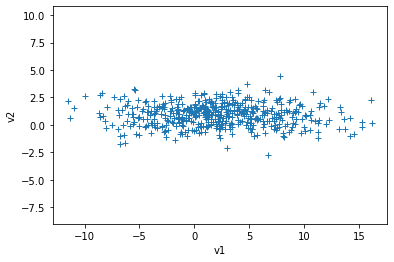

In [18]:
#your answer here
plt.plot(V[0,:],V[1,:],'+')
plt.xlabel('v1')
plt.ylabel('v2')
plt.axis('equal')

> ***Question***
> - Do you *see* the lack of correlation between $v_1$ and $v_2$?

Let's analyze the probability density function (pdf) of this data set. The function [`plt.histogram`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) provides a discrete estimate of the pdf along a given dimension.

> ***Question***
> - Adjust the number of bins and use `plt.histogram` to compute and plot an estimation of the pdf of $w_1$ and $w_2$.
> - ***(Optional)*** Compare it with the analytical probability density function of $w_1$ and $w_2$? ([Hint](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables))



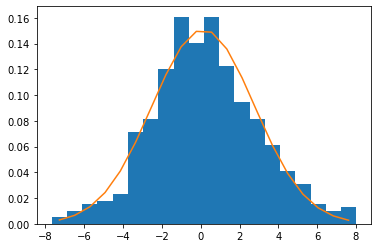

In [19]:
# your code here
bins, nbins, patches = plt.hist(W[0,:],20, density=True)

mu_v = np.array([mu1, mu2])

mu_w = R@mu_v

bin_center = 0.5*(nbins[1:]+nbins[:-1])

def gaussian(x, mu, sigma):
    '''Gaussian function of mean mu and standard deviation sigma'''
    return (1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x - mu)/sigma)**2/2))

plt.plot(bin_center,gaussian(bin_center,mu_w[0],np.sqrt(Cw[0,0])))

We can also get a quick overview of the statistical distribution of the data with [box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

> ***Question***
> - What is the meaning of a box plot?
> - Try it on $w_1$

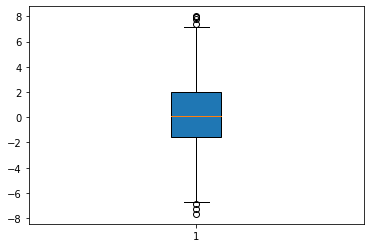

In [20]:
bplot = plt.boxplot(W[0,:],patch_artist=True)

> ***Question (optional)***
> - Use `np.histogram2d` to compute the 2-dimensional pdf
> - (***) On a single plot, superimpose the cloud of points and the contour lines of the pdf.

(-8.44828980516097, 8.78953694721177, -10.75308666313616, 16.312032503039397)

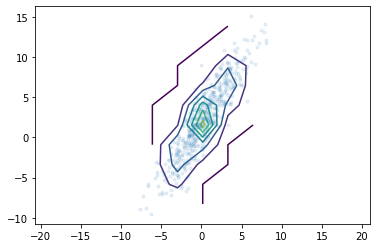

In [21]:
# The (x,y) indexing is tricky: use 2 different number of bins in each direction
psi, xedge, yedge = np.histogram2d(W[0,:],W[1,:],bins=[5,10])

x1 = 0.5*(xedge[1:] + xedge[:-1])
y1 = 0.5*(yedge[1:] + yedge[:-1])

xg,yg = np.meshgrid(x1,y1,indexing='ij')

plt.plot(W[0,:],W[1,:],'.', alpha=0.1)
plt.contour(xg,yg,psi)

plt.axis('equal')

> ***Question (Optional)***: 
> - The [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that If $X_1, X_2,\dots ,X_{n}$ are $n$ random samples drawn from a population with overall mean  $\mu$ and finite variance $\sigma ^{2}$ $\bar {X}_{n}$ is the sample mean, then the limiting form of the distribution, $Z=\lim _{n\to \infty }{\sqrt {n}}{\left({\frac {{\bar {X}}_{n}-\mu }{\sigma }}\right)}$ is a standard normal distribution. Can you propose an visual illustration of this theorem?

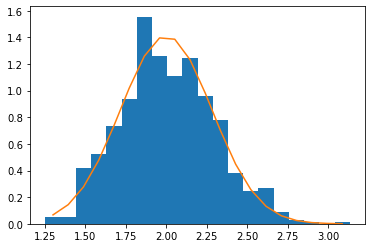

In [22]:
# your answer here
import matplotlib.pyplot as plt
# The central limit theorem states that the distribution of the sample mean should 
# converge to a gaussian N(mu, sigma^2/n)
#
# we are going to draw numbers from an exponential distribution 
# with mean and standard deviation as follows
mu_e = 2
sigma_e = mu_e

def mean_distrib(n_sample, n_viz):
    ''' 
    Computes n_viz times the mean of a random variable of size n_sample
    '''
    v = np.random.exponential(mu_e,(n_sample,n_viz))
    v_me = np.mean(v,0)
    return v_me
    
def gaussian(x, mu, sigma):
    '''Gaussian function of mean mu and standard deviation sigma'''
    return (1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x - mu)/sigma)**2/2))

# you can adjust n_sample to see how the distribution of the mean converges to 
# a Gaussian distribution
n_sample = 50
n_viz = 1000

# v_mean contains n_viz means 
v_mean = mean_distrib(n_sample,n_viz)

bins, nbins, patches = plt.hist(v_mean,int(n_viz/50), density=True)
bin_center = 0.5*(nbins[1:]+nbins[:-1])
plt.plot(bin_center,gaussian(bin_center,mu_e,sigma_e/np.sqrt(n_sample)))

### Pandas for advanced array manipulation

Compared to numpy which already handles arrays of numbers, Pandas essentially handles **metadata**. This will allow you to use predefined functions in pandas especially when it comes to time series manipulations. 

Pandas has a lot of other nice features like

- Intuitive handeling of missing data (NaN)
- Input/output in many formats
- Simplified plotting procedures (labels, axes, etc. are added automatically)
- Better managment of the memory

We are going to explore the basic functionalities of pandas with the historical CO2 measurements taken at Mona Loa also known as the [Keeling curve](https://en.wikipedia.org/wiki/Keeling_Curve). The data can be downloaded at [scrippsco2.ucsd.edu](http://scrippsco2.ucsd.edu) and we are going to analyze the daily output.

Take a moment to inspect the file that is located here `data/daily_in_situ_co2_mlo.csv` (either use a text editor or navigate within jupyter to open the file). Read the header to understand what is the data set about (you may have to investigate more to know about the units). 

> **Question**
> - Why is there NaN in the data set?

In [23]:
import pandas as pd

We are going to use the function [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to import the data in python. It is very important to do a clean import of the data so that we can work efficiently afterwards. Pay extra attention to 
- the commented part in the header (hint: `comment`)
- add a name to each column. Use the names **year**, **month**, **day** for the corresponding columns. This way, pandas will directly recognize what they are (hint: `names`)
- pandas handles spaces in cvs files in a very specific way: you may need to adjust its behavior with `skipinitialspace`.

Use `pd.read_csv` to load the content of `data/daily_in_situ_co2_mlo.csv` into a DataFrame called `df`.

In [24]:
df = pd.read_csv('data/daily_in_situ_co2_mlo.csv', comment='%',names=["Year", "Month", "Day", "CO2", "NB", "scale"], skipinitialspace=True)

To access your data, you will need to know the metadata, i.e. the label of each column in the csv file (in this case provided by yourself). You can get a quick overview of your data by typing `df.head()` or `df.describe()`. You will see that the Dataframe `df` can be treated like a spreadsheet with labeled columns and entries for each column. You can view the labels with `df.columns` and the rows indices with `df.index`. Make sure you understand the type of each column of the dataset with `df.dtypes`. 

In [25]:
#look at the data set here
df.describe()

,Year,Month,Day,CO2,NB,scale
count,23284.000000,23284.000000,23284.000000,17162.000000,23283.000000,23284.0
mean,1989.375880,6.505240,15.729213,358.803873,8.564919,12.0
std,18.403158,3.443673,8.800064,30.594377,7.323189,0.0
min,1958.000000,1.000000,1.000000,312.330000,0.000000,12.0
25%,1973.000000,4.000000,8.000000,330.650000,0.000000,12.0
50%,1989.000000,7.000000,16.000000,354.970000,8.000000,12.0
75%,2005.000000,9.000000,23.000000,385.405000,14.000000,12.0
max,2021.000000,12.000000,31.000000,420.290000,24.000000,12.0


You can select a column of the DataFrame by passing one name to `df` like `df["Year"]`. You can also select multiple columns by passing a list of names `df[["Year", "Month"]]`. To select specific rows, you need to use the method `.loc[]` to which you need to provide the index. In our case we did not provide labels for the indices so pandas automatically numbered the rows with a simple counter.

> ***Question***
> - Create a new DataFrame that contains only the first 100 entries and with the columns `Year` and `CO2` only.

In [26]:
# your answer here
df2 = df[["Year", "CO2"]].iloc[:100]

One killer feature of pandas is the way it handles time series. In order to use the full potential of such tool, one need to change the index to a date that is recognized by pandas. We use [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to combine the information in the year, month and day columns of the dataframe. `pd.to_datetime` handles various format as input and you should be careful to use the correct input format. However, because you carefully chose the name of the columns, you can directly assemble the corresponding columns to create a new object. You can follow the method in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#assembling-datetime-from-multiple-dataframe-columns) to re-allocate `df.index` to a `datetime` type variable. Henceforth, we will use `df.index` to access the time dimension.

In [27]:
#your answer here
df.index = pd.to_datetime(df[["Year", "Month", "Day"]])

> ***Question (Optional)***
> - Note that one could have done this operation directly while reading the data. Use `parse_dates` in `pd.read_csv` to create a datetime object in `df`. Try it.

In [28]:
df3 = pd.read_csv('data/daily_in_situ_co2_mlo.csv', parse_dates={'date': ["Year","Month","Day"]}, comment='%',names=["Year", "Month", "Day", "CO2", "NB", "scale"], skipinitialspace=True)
df3.head()

,date,CO2,NB,scale
0,1958-01-01,NaN,0.0,12.0
1,1958-01-02,NaN,0.0,12.0
2,1958-01-03,NaN,0.0,12.0
3,1958-01-04,NaN,0.0,12.0
4,1958-01-05,NaN,0.0,12.0


Now `df.index` contain [Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html)s. You can quickly access the day, month, year of the reccords by using `df.index.day`, `df.index.month` `df.index.year` (etc. see documentation). You can also construct time intervals (or [timedetla](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html)s) by subtracting two timestamps

> ***Question***
> - Subtract the first index to the last index to know how many days are in this data set

In [29]:
#your answer here
number_days = (df.index[-1]-df.index[0]).days
print("There are {} days in this data set".format(number_days))

There are 23283 days in this data set


Pandas has built-in plotting features that are based on matplotlib. Since you now master matplotlib, you will find it very easy to plot data within pandas. 

> ***Question***
> - Plot the CO2 time series as a function of time. (Hint: select the column of interest in df and simply apply the method `.plot()`)

<AxesSubplot:>

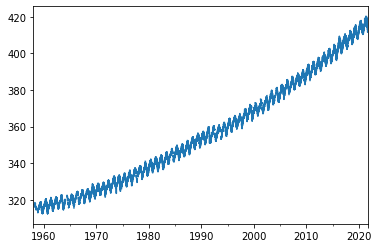

In [30]:
# your answer here
df["CO2"].plot()

The CO2 curve is increasing. This is not really a surprised if you followed the news lately. However, we also notice wiggely patterns superimposed to this trend. Are we looking at noisy data are does it have a physical meaning?

> ***Question***
> - In order to get a closer look, can you plot only 2 years of the CO2 time series between Jan 1st 2000 and Jan 1st 2002?

In order to achieve this, you need to select the data for wich `df.index >= '2000-01-01'` and `df.index <= '2002-01-01'`.

<AxesSubplot:>

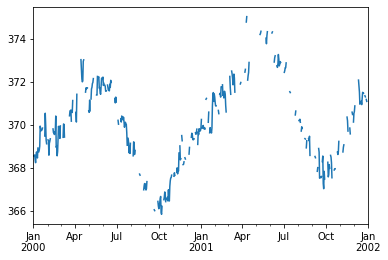

In [31]:
#your answer here
df['CO2'][(df.index >= '2000-01-01') & (df.index <= '2002-01-01')].plot()

So there seem to be a lot of variability and many missing data in this data set. We can try to average all available data for each single year that we have. That way we will probably see a smoother curve. The [`resample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) function is here to create a new time series with the desired sampling frequency. The accronym for standard time intervals are listed in the [Time series documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). You need to either add the method `.mean()` or `.sum()` to the resampled data to indicate how to treat the data in the resampling interval.

> ***Question***
> - Plot the yearly average evolution of the CO2 concentration.

<AxesSubplot:>

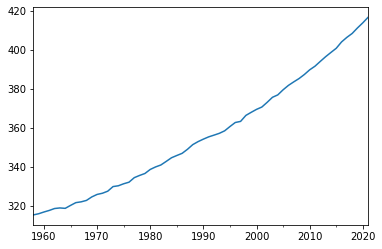

In [32]:
#your answer here
df['CO2'].resample('YS').mean().plot() 

These wiggles are not random but are the actual annual cycle of the data.
> ***Question (Optional)***
> - Use the method `.groupby` to plot the annual cycle
> - Discuss the physical origin of this anual cycle

<AxesSubplot:>

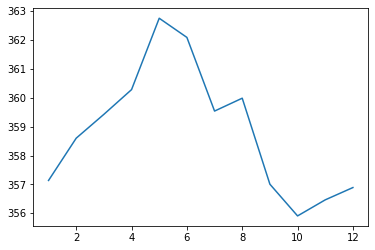

In [33]:
#your answer here
df['CO2'].groupby(df.index.month).mean().plot()
# This seasonal cycle is due to the photosynthesis that occurs mostly in summer in the northern hemisphere 
# (plants absorb more CO2 ).

### Scikit-learn for data analysis

[Scikit-learn](https://scikit-learn.org/) will be our toolbox for all statistical analysis. It provides the most popular machine learning algorithm, is well documented and has an active user community. Scikit learn does not work well with missing data. So in order to have a smooth transition between pandas and scikit-learn, it is convenient to create a copy of your DataFrame without any `NaN`. Make sure you use (and understand) the [`.copy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) method to create the new array because we are going to make modification to this new DataFrame. You can call this new DataFrame `dfv`.

In [34]:
dfv = df.dropna().copy()

Because we cannot do a linear regression with dates as indices, we need to create an additional column that contains the day number since the begining of the dataset. Remember how we worked with timedelta (and broadcasting) above?

> ***Question***
> - Can you create this new column and name it `counter`?

*Be careful that this new variable must have dtype int (or float) and not a timedelta. (Hint: look at the [attributes of timedelta](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html#attributes))*

In [35]:
dfv["counter"] = (dfv.index - dfv.index[0]).days

We are now ready to use the [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.

In [36]:
from sklearn.linear_model import LinearRegression

We are first going to [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) the data. As explained in the documentation, this function takes at least two arguments: the predictors and the observations. Predictors must be a 2d array of shape (n_samples, n_features), **even if there is only ONE feature**. One simple way to achieve this is to select a list of only one variable in the DataFrame (i.e. `dfv[["counter"]]`, note the usage of double brackets here).

> ***Question***
> - Perform the linear regression and put the output in the variable `reg`.

In [37]:
reg = LinearRegression().fit(dfv[["counter"]], dfv["CO2"])

> ***Question***
> - What is the value of the regression coefficient?
> - What is its physical meaning?

In [38]:
print("The regression coefficient is {} ppm/day".format(reg.coef_))
#It correspond to the average daily growth rate of CO2 in the atmosphere

The regression coefficient is [0.00442881] ppm/day


> ***Question***
> - Use the method `.predict` to construct the predicted value at all observation times and add it to the `dfv` DataFrame.

In [39]:
dfv["co2fit"] =  reg.predict(dfv[["counter"]])

> ***Question***
> - Plot the observed value along with your prediction on a single plot.

<AxesSubplot:>

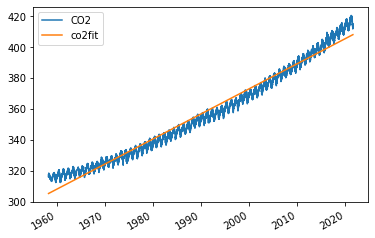

In [40]:
dfv[["CO2", "co2fit"]].plot()

It is now super easy to compute the co2 growth rate in ppm/year for several time periods.
> ***Question***
> - Perform 2 linear regressions: one between 1960 and 1980 and one between 2000 and 2020 and compare how the growth rate evolved over time.
> - Can you give an estimate of the CO2 concentration in 2050?


In [41]:
reg_2000 = LinearRegression().fit(dfv[["counter"]][dfv.index.year>2000], dfv["CO2"][dfv.index.year>2000])
reg_1960 = LinearRegression().fit(dfv[["counter"]][dfv.index.year<1980], dfv["CO2"][dfv.index.year<1980])

print("The growth rate changed from {}ppm/day to {}ppm/day from 1970 to 2010".format(reg_1960.coef_,reg_2000.coef_))

# rough estimate of the number of days between 1960 and 2050 (90 years x 365 days)
nday_2050 = 90*365
predict_co2_2050 = reg_2000.intercept_ + nday_2050*reg_2000.coef_
print("With the most recent growth rate, there will be {} ppm of CO2 in 2050".format(predict_co2_2050))

The growth rate changed from [0.00280231]ppm/day to [0.00617474]ppm/day from 1970 to 2010
With the most recent growth rate, there will be [475.42556763] ppm of CO2 in 2050


***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>